# Ford GoBike System Data Exploration
## by Emmanuel Waribo Otiti
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#prem">Preliminary Wrangling</a>><a href="#clean">Cleaning Data</a></li>
<li><a href="#uni">Univariate Exploration</a></li>
<li><a href="#bi">Bivariate Exploration</a></li>
<li><a href="#mul">Multivariate Exploration</a></li>
<li><a href="#con">Conclusion</a></li>
</ul>

<a id='intro'></a>

## Introduction
>This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. Looking at Bay Wheels's trip data for public use in the month of Febuary 2019, the dataset can be gotten from [Here](https://github.com/BetaNYC/Bike-Share-Data-Best-Practices/wiki/Bike-Share-Data-Systems).
>The dataset contains 183412 rows with 16 columns which are duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip.

<a id='prem'></a>
## Preliminary Wrangling

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
from datetime import datetime
from datetime import date

# Setting color 
color = sb.color_palette()[0]

%matplotlib inline

In [3]:
# load in the dataset into a pandas dataframe, print statistics
bikes = pd.read_csv('fordgobike.csv')

In [4]:
# overview of data shape
print(bikes.shape)

(183412, 16)


In [5]:
#Showing the datatype of variables and null value counts
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
# Displaying the first 5 rows of the dataset
bikes.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


### What is the structure of your dataset?

> There are 183412 records in the dataset, with 16 features (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, and bike_share_for_all_trip.). Some of the variables are in the wrong datatypes and will be converted.

### What is/are the main feature(s) of interest in your dataset?

> I'm interested in figuring out what features are best for knowing when most trips are taken in terms of time of day, day of the week, or month of the year? The main features include data related to the start and end of a ride.
I'm most interested in figuring out how does every different biker group (gender, age, custormer-subscriber) behave and how the bike use change through time.



### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The start and end times, and related time-based information.

<a id='clean'></a>
## Data Cleaning

In [7]:
# Create a copy of the dataset 
bike = bikes.copy()

In [8]:
# Drop missing values 
bike.dropna(inplace=True)

In [9]:
#From bikes.info() converting start_time and end_time to datetime datatype
bike.start_time = pd.to_datetime(bike.start_time)
bike.end_time = pd.to_datetime(bike.end_time)

In [10]:
# set bike id, start_station_id, end_station_id to object
bike.bike_id = bike.bike_id.astype(str)
bike.start_station_id = bike.start_station_id.astype(str)
bike.end_station_id = bike.end_station_id.astype(str)

In [11]:
# Changing the user_type, member_gender, and bike_share_for_all_trip to category format
bike.user_type = bike.user_type.astype('category')
bike.member_gender = bike.member_gender.astype('category')
bike.bike_share_for_all_trip = bike.bike_share_for_all_trip.astype('category')

In [12]:
# Changing start_time and end_time format to datetime
bike['start_date'] = bike['start_time'].dt.date
bike['starttime'] = bike['start_time'].dt.time

bike['end_date'] = bike['end_time'].dt.date
bike['endtime'] = bike['end_time'].dt.time

In [13]:
# Start time weekday
bike['start_time_weekday'] = bike['start_time'].dt.strftime('%a')

In [14]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

In [15]:
#Getting the start hour from the start time
bike['hour_start']=bike['start_time'].dt.hour

In [16]:
#Getting the duration min and hour and converting to float datatype
bike['duration_min']=bike['duration_sec']/60
bike['duration_hr']=bike['duration_min']/60
bike['duration_min']=bike['duration_min'].astype(float)
bike['duration_hr']=bike['duration_hr'].astype(float)

In [17]:
# A function to calculate age of each user
def calculate_age(born):
    today = date.today()
    return today.year - born

bike['Age'] = bike.member_birth_year.map(calculate_age)
bike['Age'] = bike['Age'].astype(int)

In [18]:
#Getting the customer decade variable by using cut function on the age column
bin_edges=[0,18.000000,30,40,50,60,70,140]
bin_names=['underage','18s','30s','40s','50s','60s','>70']
bike['Customer_decade']=pd.cut(bike['Age'],bin_edges,labels=bin_names)

In [19]:
#First 3 rows and headers after data wrangling and cleaning
bike.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,start_date,starttime,end_date,endtime,start_time_weekday,hour_start,duration_min,duration_hr,Age,Customer_decade
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,2019-02-28,17:32:10.145000,2019-03-01,08:01:55.975000,Thu,17,869.750000,14.495833,38,30s
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,2019-02-28,12:13:13.218000,2019-03-01,05:24:08.146000,Thu,12,1030.900000,17.181667,50,40s
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,2019-02-28,17:54:26.010000,2019-03-01,04:02:36.842000,Thu,17,608.166667,10.136111,33,30s


In [20]:
#Dropping columns that are not important
bike.drop(['start_station_latitude', 'start_station_longitude','end_station_latitude','end_station_longitude', 
         'member_birth_year', 'start_time', 'end_time'], axis=1, inplace=True)

In [21]:
# First 3 rows and headers after dropping columns that are not relevant to our analysis
bike.head(3)

,duration_sec,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,start_date,starttime,end_date,endtime,start_time_weekday,hour_start,duration_min,duration_hr,Age,Customer_decade
0,52185,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,Male,No,2019-02-28,17:32:10.145000,2019-03-01,08:01:55.975000,Thu,17,869.750000,14.495833,38,30s
2,61854,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,Male,No,2019-02-28,12:13:13.218000,2019-03-01,05:24:08.146000,Thu,12,1030.900000,17.181667,50,40s
3,36490,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,Other,No,2019-02-28,17:54:26.010000,2019-03-01,04:02:36.842000,Thu,17,608.166667,10.136111,33,30s


In [22]:
# Saving the cleaned data into a new csv file
bike.to_csv('bike_clean.csv')

<a id='uni'></a>
## Univariate Exploration

> In this section, I investigated distributions of individual variables. I looked at relationships between variables distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  


### 1. What is the distribution of week days useage ?

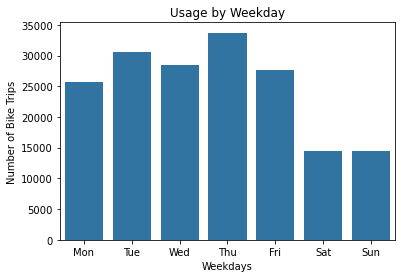

In [23]:
# Weekday usage of the Ford Go bike system
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

sb.countplot(data=bike, x='start_time_weekday', order = weekday, color = color);
plt.title('Usage by Weekday');
plt.xlabel('Weekdays');
plt.ylabel('Number of Bike Trips');

>From the plot thursdays has the highest usage followed by tuesdays, while during the weekends (saturdays and sundays) record low
activities

### 2. What is the distribution of users age ?

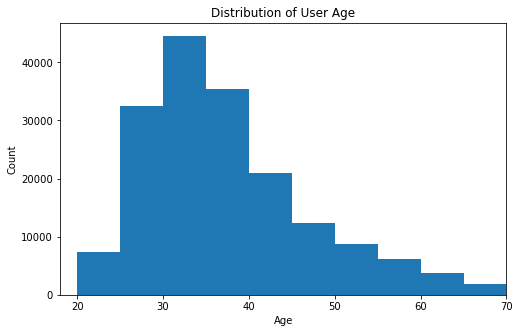

In [24]:
# plot distribution of age
plt.figure(figsize = [8, 5])

binsize = 5
bins = np.arange(0, bike['Age'].max()+binsize, binsize)

plt.hist(data = bike, x = 'Age', bins = bins)
plt.xlim(18, 70)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of User Age')
plt.show()

The distribution users age is right-skewed with the peak at between 30 to 35 and as age gets higher, user count decreases

### 3. What is the distribution of Gender

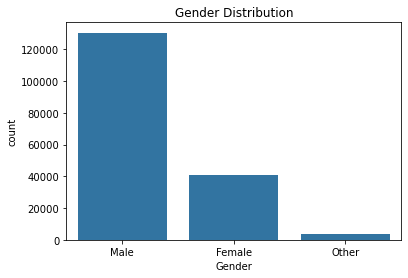

In [25]:
# Plotting the distribution of gender data 
bikeOrder = bike.member_gender.value_counts().index
sb.countplot(data=bike, x='member_gender' , color=color , order=bikeOrder);
plt.title('Gender Distribution');
plt.xlabel('Gender');

> Most users of the bike system happen to be males

### 4. What is the distribution of User Type ?

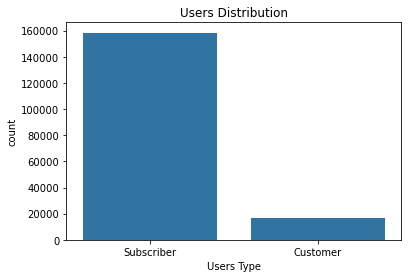

In [26]:
# Distribution of types of users 
userOrder = bike.user_type.value_counts().index
sb.countplot(data=bike, x='user_type' , color=color , order=userOrder);
plt.title('Users Distribution');
plt.xlabel('Users Type');

> This shows that subcribers make use of the system more often

### 5. Most popular start stations

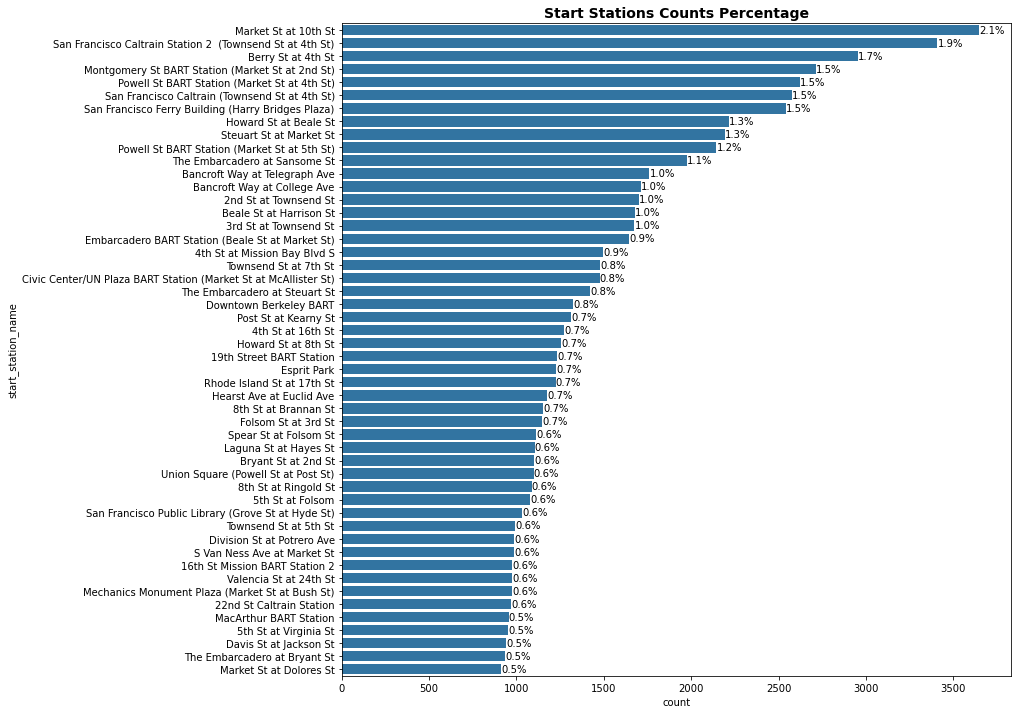

In [27]:
# Most popular Start station 
fig_dims = (12, 12)
fig, ax = plt.subplots(figsize=fig_dims)
c = sb.color_palette()[0]
orde = bike.start_station_name.value_counts().head(50).index
sb.countplot(data=bike , y='start_station_name' , color=c , order=orde);
plt.title('Start Stations Counts Percentage', fontsize=14, fontweight='bold');

# Putting percentage  
start_counts = bike.start_station_name.value_counts().head(50)
for i in range(start_counts.shape[0]):
  count = start_counts[i]
  pct_string = '{:0.1f}%'.format(100*count/bike.shape[0])
  plt.text(count+1, i, pct_string, va = 'center');

> From the plot it shows that most customers that make use of the system usaully start from Market St at 10th St station 
followed by San Francisco Caltrain Station 2 [Townsend St at 4th St]. This might also mean most of the system users stay around that area.

### 6. Popular destination station of bike share system

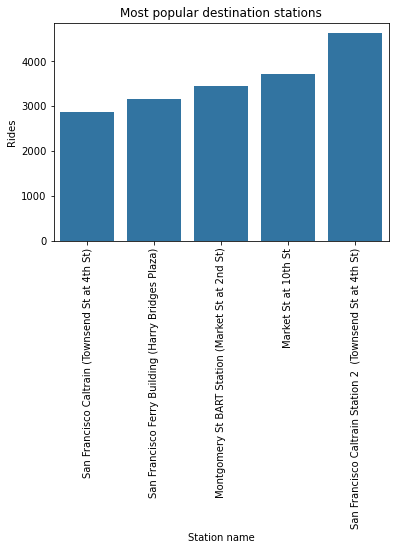

In [28]:
# Plotting the top 5 destination stations 
mcount=bike.groupby('end_station_name').size().sort_values().tail()
mcount = mcount.reset_index(name = 'count')
pl=sb.barplot(data = mcount, x ='end_station_name',y='count', color = color);
pl.set_title('Most popular destination stations')
pl.set_ylabel('Rides')
pl.set_xlabel('Station name');
plt.xticks(rotation=90);

> From the plot above that shows the top 5 destination of the system, it might mean that these locations can either be locations 
of where customers work or stay. 

### 7. Distrbution of bike share for all trip

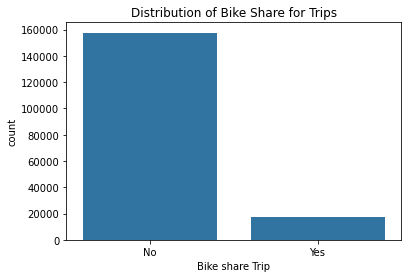

In [29]:
# Plotting the Distribution of bike share for all trip
sb.countplot(data=bike,x='bike_share_for_all_trip', color = color);
plt.title('Distribution of Bike Share for Trips');
plt.xlabel('Bike share Trip');

>Interestingly, the bike share was not used for all of the commuter’s trip. This might imply 
that the system is mostly used in cities.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I did some cleaning and tidying in the data, which made it posible to discuss the different variable distributions.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The trip duration was further splitted into minutes and hours.

> I engineered new variables: month, customer decade, start_date, end_date, and age from existing variabes.


<a id='bi'></a>
## Bivariate Exploration

> In this section, i investigated relationships between pairs of variables in the
data. 

### 1. Relationship between Gender and Age

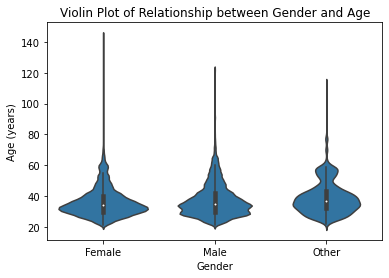

In [30]:
# plotting violin 
sb.violinplot(data=bike, x='member_gender', y='Age', color=color, innner=None);
plt.title('Violin Plot of Relationship between Gender and Age');
plt.xlabel('Gender');
plt.ylabel('Age (years)');

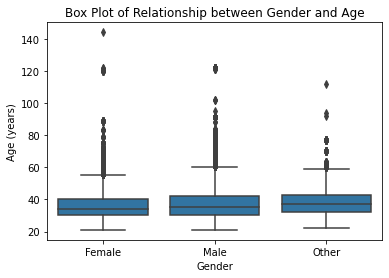

In [31]:
# plotting box plot 
sb.boxplot(data=bike, x='member_gender', y='Age', color=color);
plt.title('Box Plot of Relationship between Gender and Age');
plt.xlabel('Gender');
plt.ylabel('Age (years)');

>Though not a huge difference, From both plots we can see the members gender age distribution, with the mean across
genders almost the same. There tend to be a higher outlier in the female age. 

### 2. Relation between Ages and Time Duration of trip ?

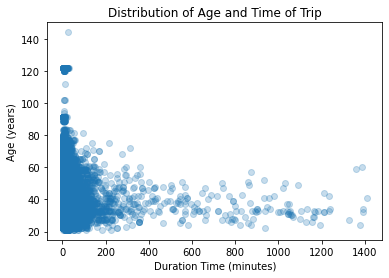

In [32]:
# plotting relation between ages and time tripping 
plt.scatter(data=bike, x='duration_min' ,y='Age', alpha=5/20);
plt.xlabel('Duration Time (minutes)');
plt.ylabel('Age (years)');
plt.title('Distribution of Age and Time of Trip');

> From the plot we can deduce that age brackets of 20-80 prefer to spend thier trips less than 200 minutes. While users above 100
are very few that tend to spend less than 100 minutes duration trips. 

### 3. Relationship of user type and duration of trip 

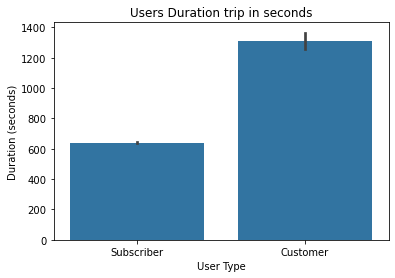

In [33]:
# making the order of user type 
userOrder = bike.user_type.value_counts().index
sb.barplot(y='duration_sec' , x='user_type' ,data=bike, color=color , order=userOrder);
plt.title('Users Duration trip in seconds');
plt.xlabel('User Type');
plt.ylabel('Duration (seconds)');

> From the plot customers users spend more time than subscriber users

### 4. Relationship of gender and week days

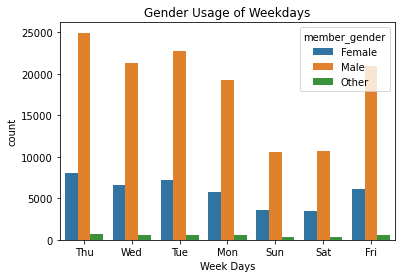

In [34]:

sb.countplot(data = bike, x = 'start_time_weekday', hue = 'member_gender');
plt.title('Gender Usage of Weekdays');
plt.xlabel('Week Days');

> This plot shows that male gender are the highest users every day of the week

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> It was discovered that older users above 85 years do not use the system for duration higher than 100 minutes. Furthermore, even when it was discovered that subcribers were higher than customers, in the plot(3) above it was discovered that customers had longer time durations in their trip as compared to subcribers.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> No interesting relationship between other feature. The relationship that exist between users age and the categorial variables do not seem to have any significant difference.

<a id='mul'></a>
## Multivariate Exploration

> I created plots of three or more variables to investigate the data even
further. 

### 1. Relation between trips taken by customers and subscribers on weekdays and weekends ?

In [35]:
# masking the customers of user_type
customers = bike.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_time_weekday', 'hour_start']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index = 'hour_start', columns = 'start_time_weekday', values = 'count')

# masking the subcribers of user_type
subcriber = bike.query('user_type == "Subscriber"')
ct_count = subcriber.groupby(['start_time_weekday', 'hour_start']).size()
ct_count = ct_count.reset_index(name='count')
ct_count = ct_count.pivot(index = 'hour_start', columns = 'start_time_weekday', values = 'count')

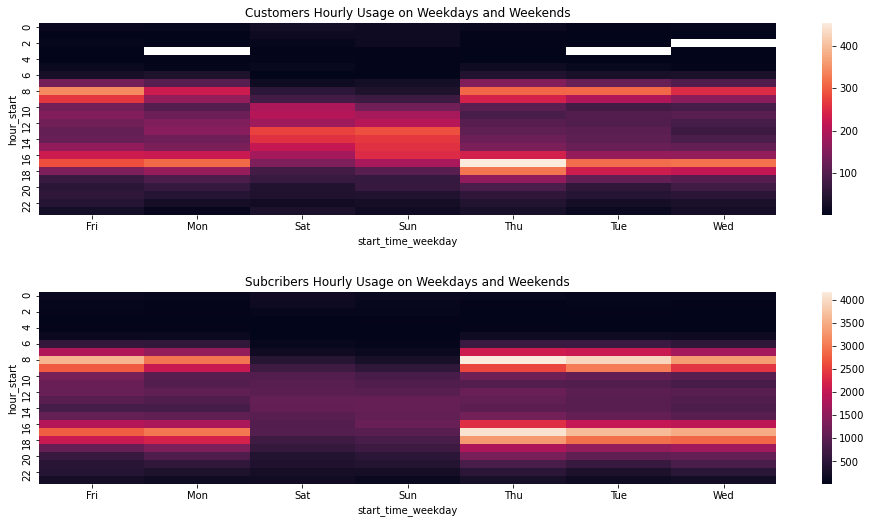

In [44]:
# Plotting a heatmap of hour start trips taken by diferent users on weekdays and weekends
plt.figure(figsize = (16,8));
plt.subplot(2, 1, 1);
sb.heatmap(ct_counts);
plt.title('Customers Hourly Usage on Weekdays and Weekends');

plt.subplot(2, 1, 2);
plt.subplot(2, 1, 2);
sb.heatmap(ct_count);
plt.title('Subcribers Hourly Usage on Weekdays and Weekends');
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4);

> The plot shows the trips taken by customers and subscribers on weekdays and weekends.

### 2.  Customers gender, age decade and start hour relationship

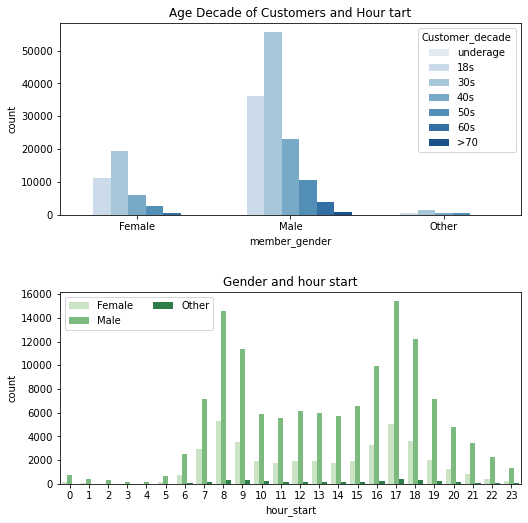

In [41]:
# Plotting 2 graphs of gender with other variables
plt.figure(figsize = [8, 8])

# subplot 1: gender vs count and customer decade
plt.subplot(2, 1, 1)
sb.countplot(data = bike, x = 'member_gender', hue = 'Customer_decade', palette = 'Blues');
plt.title('Age Decade of Customers and Hour tart');

# subplot 2: start hour vs count and gender
ax = plt.subplot(2, 1, 2)
sb.countplot(data = bike, x = 'hour_start', hue = 'member_gender', palette = 'Greens')
ax.legend(ncol = 2);
plt.title('Gender and hour start');
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4);

plt.show()

>The plot shows majority of riders are at decades 20 and 30. Also male users has the highest rides around 8 hour 
and 17 hour which might indicate start of work and close of work.

### 3. Average trip duration variation in weekdays between customers and subscribers ?

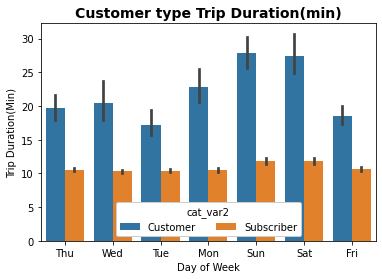

In [38]:
# Plotting user type with day of the week and time duration of trip in minutes
ax = sb.barplot(data = bike, x = 'start_time_weekday', y = 'duration_min', hue = 'user_type');
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'cat_var2');
plt.xlabel('Day of Week');
plt.ylabel('Trip Duration(Min)');
plt.title('Customer type Trip Duration(min)', fontsize=14, fontweight='bold');

> From the plot it can be seen that subscribers ride much shorter/quicker trips 
compared to customers on each day of the week.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
 
> Some features showed Customers to Subscribers differences as seen in the multivariate exploration which strengthened some of the patterns discovered in the previous bivariate exploration as well as univariate exploration, the relationship between the multiple variables plotted were visualized together with the information being presented. The high concentration on rush hours Monday through Friday, indicates FordGo bike system use is primarily for work commute.


### Were there any interesting or surprising interactions between features?

> My surprise in the data is how customers tend to have more trip durations than customers.

<a id='con'></a>
## Conclusions
> FordGo Bike System is a way of moving around in the city, both for enjoyment and work. The two types of clients using the system are subscribers and customers of which are mostly males. Subscribers who are daily commuters usually have short trips to and fro from work, who rent a bike on weekdays at 8am - 9am and 5pm - 6pm, occasionally around lunch time. Customers are usually occassional riders who use the system mainly on weekends for longer time duration more than subcribers users.